In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install seaborn
import matplotlib as mplt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
from tensorflow.python.util import deprecation
import os
import logging
import seaborn as sns
from tqdm import tqdm
from IPython.display import display, HTML
import geopy
from sklearn.cluster import KMeans

# display(HTML("<style>.container { width:85% !important; }</style>"))
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
pd.set_option('display.max_columns', None)

pd.set_option('mode.chained_assignment', None)

RS = range(0,25,1)

print('currently running tensorflow version: ' + tf.__version__)

2022-08-19 08:20:02.132532: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-19 08:20:02.132551: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


currently running tensorflow version: 2.9.1


In [2]:
df = gl.predictions_loader()

df = df[
    (df['dataframe'].str.contains('df7_')) 
    &
    (df['architecture'] == '10-5')
    &
    (df['learning rate'] == '0.010')
    &
    (df['epochs'] == '100')
]

df = gl.glathida_stats_adder(
    df,
    pth_1 = '/home/simonhans/data/prethicktor/regional_data/raw/',
    pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/',
    pth_3 = '/home/simonhans/data/prethicktor/regional_data/training_data/',
)
df

100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 252.96it/s]


,vol,Area_RGI_iqr,Area_RGI_mean,Area_RGI_median,Area_RGI_std,Aspect_RGI_iqr,Aspect_RGI_mean,Aspect_RGI_median,Aspect_RGI_std,Lmax_RGI_iqr,Lmax_RGI_mean,Lmax_RGI_median,Lmax_RGI_std,Slope_RGI_iqr,Slope_RGI_mean,Slope_RGI_median,Slope_RGI_std,Zmax_RGI_iqr,Zmax_RGI_mean,Zmax_RGI_median,Zmax_RGI_std,Zmin_RGI_iqr,Zmin_RGI_mean,Zmin_RGI_median,Zmin_RGI_std,architecture,area,dataframe,epochs,h mean f,learning rate,region,tolerance,total variance,volf,mean thickness,voldiff,Area_GlaThiDa_mean,Aspect_GlaThiDa_mean,Lmax_GlaThiDa_mean,Slope_GlaThiDa_mean,Zmin_GlaThiDa_mean,Zmax_GlaThiDa_mean,Area_GlaThiDa_median,Aspect_GlaThiDa_median,Lmax_GlaThiDa_median,Slope_GlaThiDa_median,Zmin_GlaThiDa_median,Zmax_GlaThiDa_median,Area_GlaThiDa_std,Aspect_GlaThiDa_std,Lmax_GlaThiDa_std,Slope_GlaThiDa_std,Zmin_GlaThiDa_std,Zmax_GlaThiDa_std,ratio trainable,vol_ratio,vol_from_zero
147,5.989575,0.92400,4.259054,0.4430,50.491526,244.0,195.227967,226.0,122.682674,1259.00,1977.983111,950.0,4645.133781,9.000,22.642861,22.00,6.333523,563.00,1834.176898,1827.0,491.597716,605.00,1290.382731,1314.0,457.285531,10-5,73890.321,df7_01,100,218.0,0.010,01,4.92,2.438608,18.98,81.060341,-12.990425,31.746125,178.125000,7208.750000,18.625000,1505.125000,2278.000000,1.8260,206.0,2351.0,21.00,1579.5,2554.0,76.730266,116.309326,13254.758068,5.452924,735.136116,800.062341,0.000295,0.315573,0.684427
218,1.266035,0.47700,0.783060,0.1870,4.609983,261.0,154.641819,105.0,127.848895,701.00,920.344790,578.0,1225.462142,9.500,24.439044,24.20,7.380997,659.75,2403.221295,2340.0,564.812650,637.00,2056.899002,1965.0,605.903653,10-5,14444.330,df7_02,100,72.0,0.010,02,0.27,1.029544,1.06,87.649301,0.206035,2.062406,168.531250,2526.000000,21.178125,2241.687500,3116.937500,1.1850,162.5,2138.0,20.80,2007.5,3011.0,3.074268,120.333387,2238.034517,5.621317,601.644384,608.579182,0.001697,1.194373,0.194373
184,53.623194,6.79225,23.105548,1.7635,124.489624,240.0,181.533861,183.0,120.888736,3494.50,4468.925462,1886.5,7969.118795,7.700,15.441953,14.40,6.112923,486.25,1053.947669,1059.0,367.675504,417.25,510.087071,525.0,292.411531,10-5,105084.033,df7_03,100,270.0,0.010,03,7.35,3.898395,28.33,510.288690,25.293194,1238.533333,259.000000,54630.333333,6.100000,16.000000,1419.666667,999.8610,323.0,71606.0,6.30,0.0,1921.0,1046.519763,92.639085,32082.883332,0.509902,22.627417,819.563434,0.000658,1.892806,0.892806
49,11.730338,2.14750,5.514259,0.6570,43.879279,236.0,172.181254,163.0,120.474964,1924.50,2331.581389,1191.0,3683.474811,7.100,17.700000,16.90,5.800160,447.50,1119.713554,1120.0,315.732986,389.00,700.133378,695.0,303.851676,10-5,40888.228,df7_04,100,210.0,0.010,04,2.23,1.819072,8.61,286.887909,3.120338,1479.180000,30.500000,31318.000000,7.300000,420.500000,1452.000000,1479.1800,30.5,31318.0,7.30,420.5,1452.0,1292.232000,20.500000,1445.000000,3.700000,17.500000,335.000000,0.000270,1.362409,0.362409
133,13.086196,1.70700,6.420456,0.3930,79.442858,216.0,179.737868,177.0,114.502877,1606.00,2041.995063,838.0,3956.197049,12.900,20.430547,19.60,9.218062,668.00,1253.692304,1221.0,488.383456,610.00,781.527324,761.0,436.150937,10-5,130059.170,df7_05,100,175.0,0.010,05,4.07,5.206576,15.69,100.617251,-2.603804,20.154000,261.000000,8083.000000,11.300000,159.000000,983.000000,20.1540,261.0,8083.0,11.30,159.0,983.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000049,0.834047,0.165953
273,6.066283,2.57225,19.531337,0.5635,117.210684,229.0,170.358657,152.0,117.748556,2074.25,3148.473498,983.0,6831.996506,8.600,17.630212,16.75,6.573607,243.75,1294.558304,1267.0,247.310301,266.25,892.000000,935.5,252.111431,10-5,11054.737,df7_06,100,341.0,0.010,06,0.98,1.295514,3.77,548.749644,2.296283,608.658000,142.000000,28302.666667,11.366667,477.666667,1511.000000,264.5360,117.0,22676.0,7.30,607.0,1762.0,682.150351,41.880783,25153.662349,7.512360,262.994719,499.241425,0.005282,1.609094,0.609094
191,9.025042,7.09350,21.027204,1.8740,78.127422,234.0,174.302167,164.0,120.216076,3937.50,4961.415480,2471.0,6949.757330,6.700

# HISTOGRAMS

/home/simonhans/anaconda3/envs/prethicktor-gdal/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


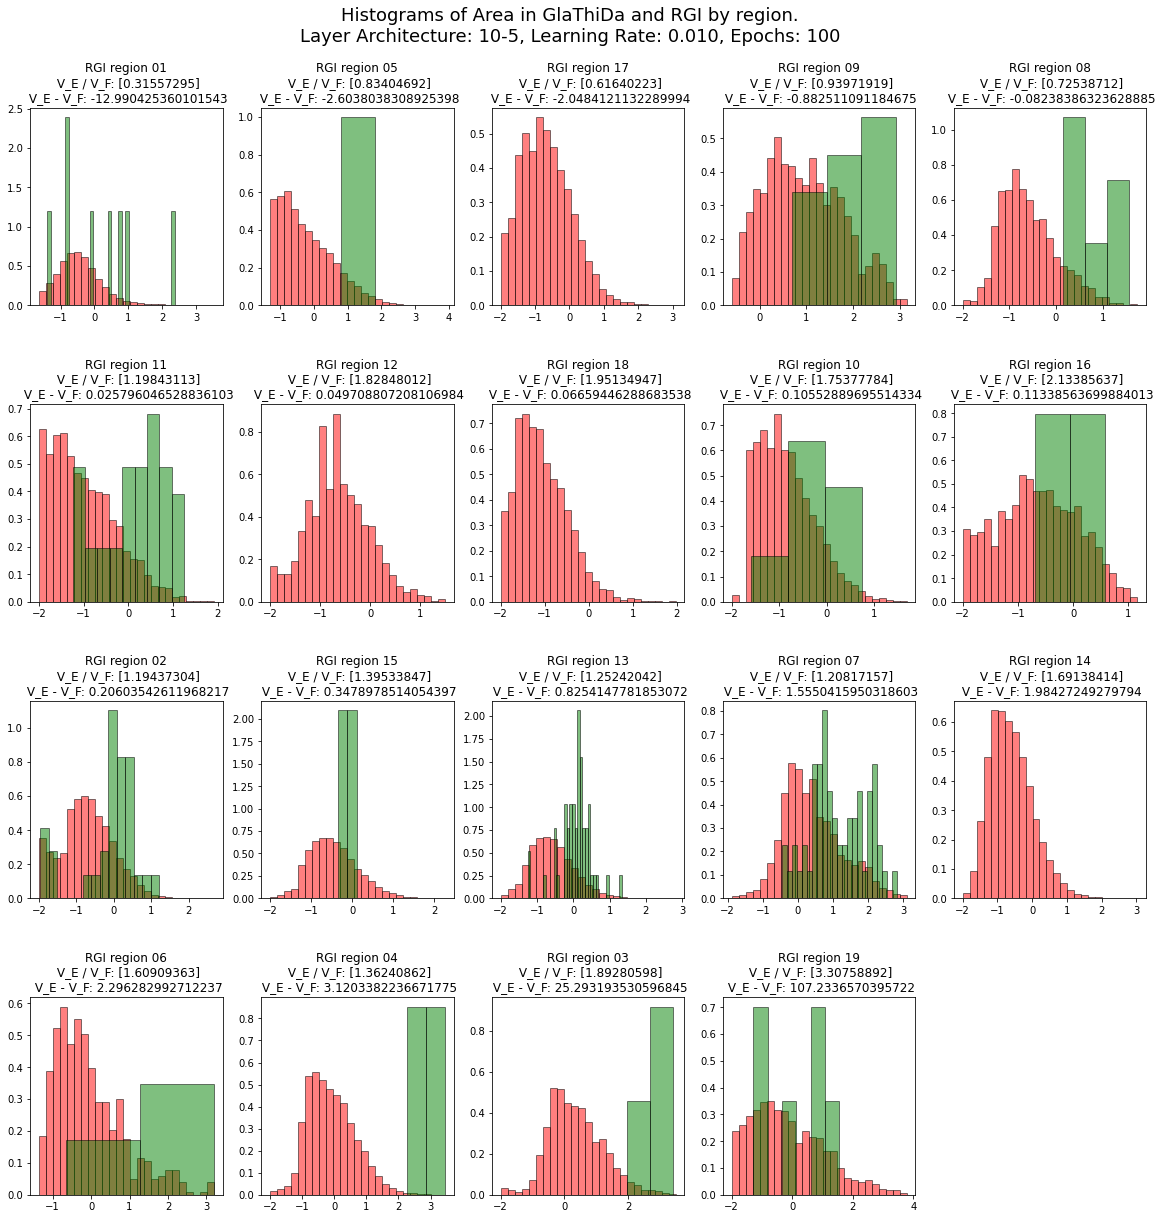

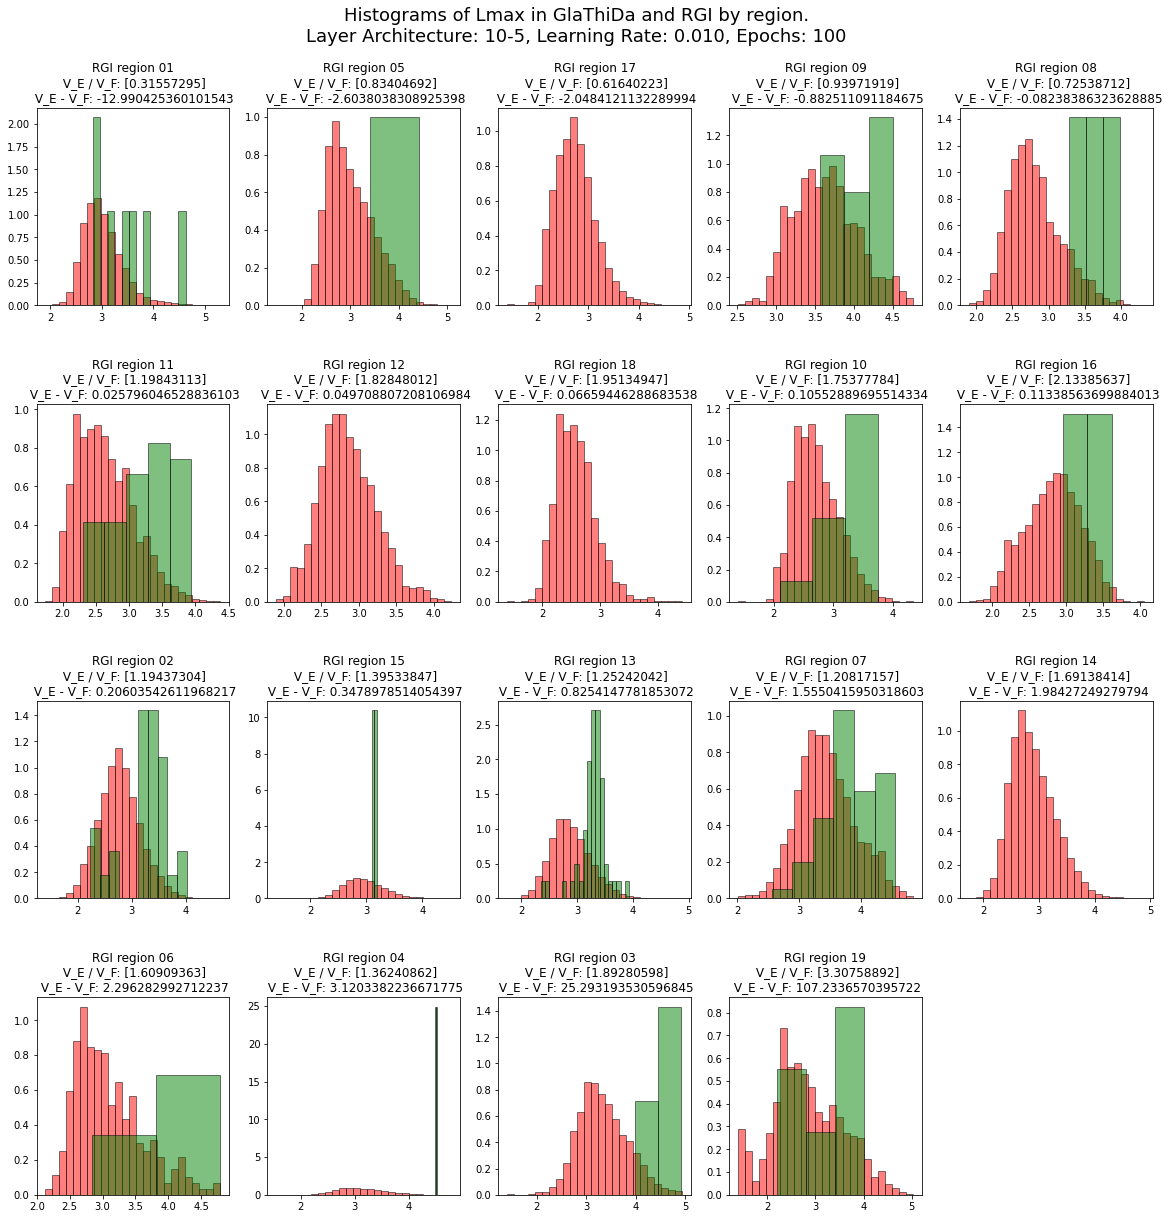

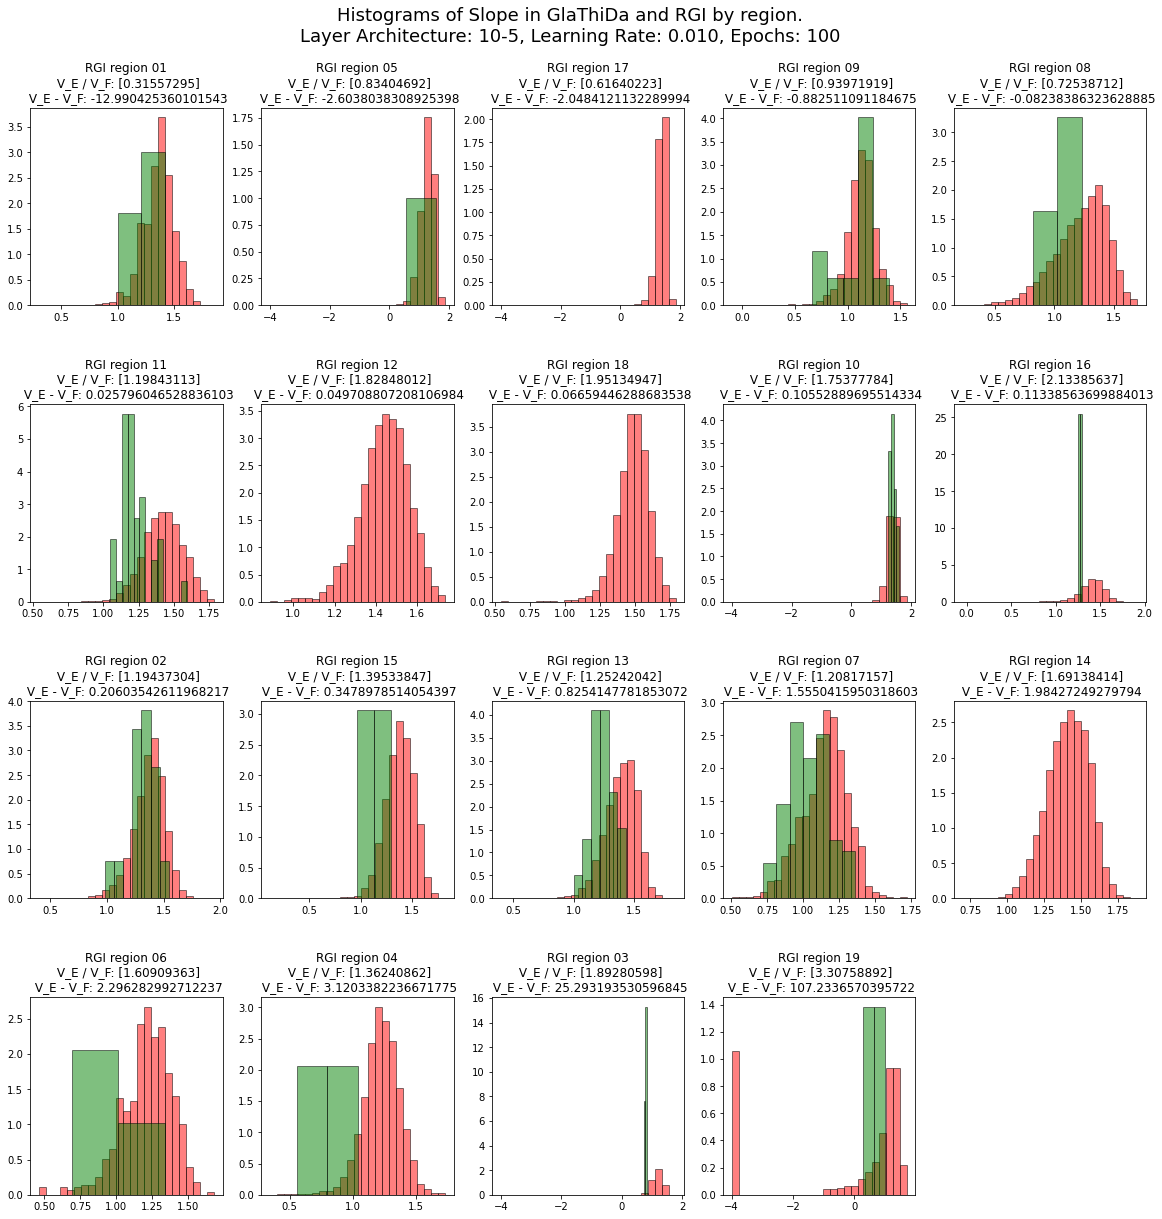

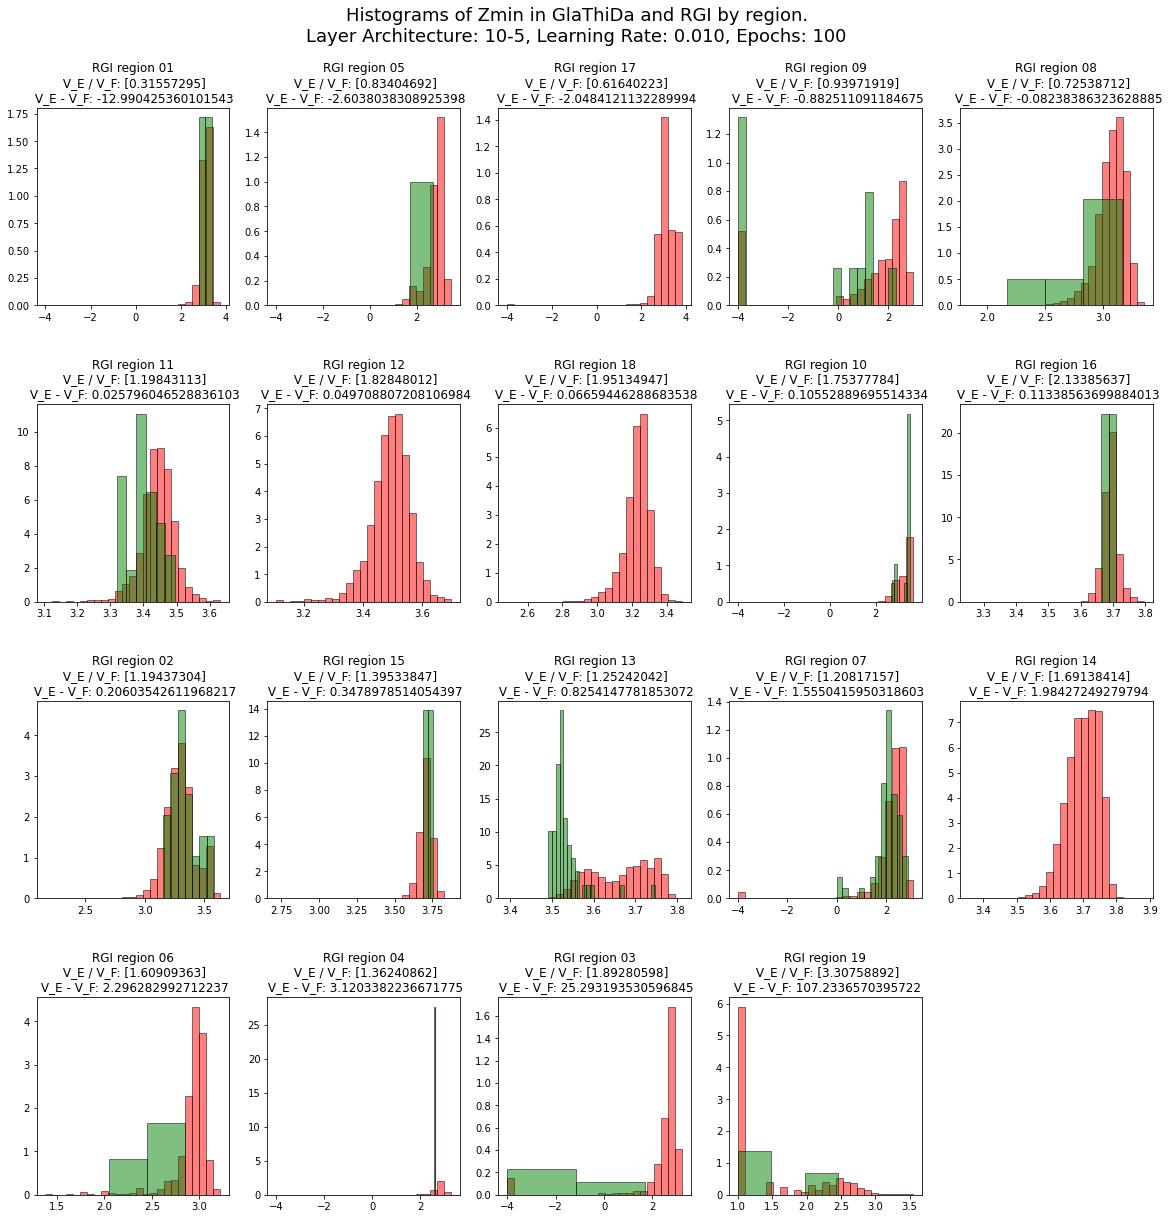

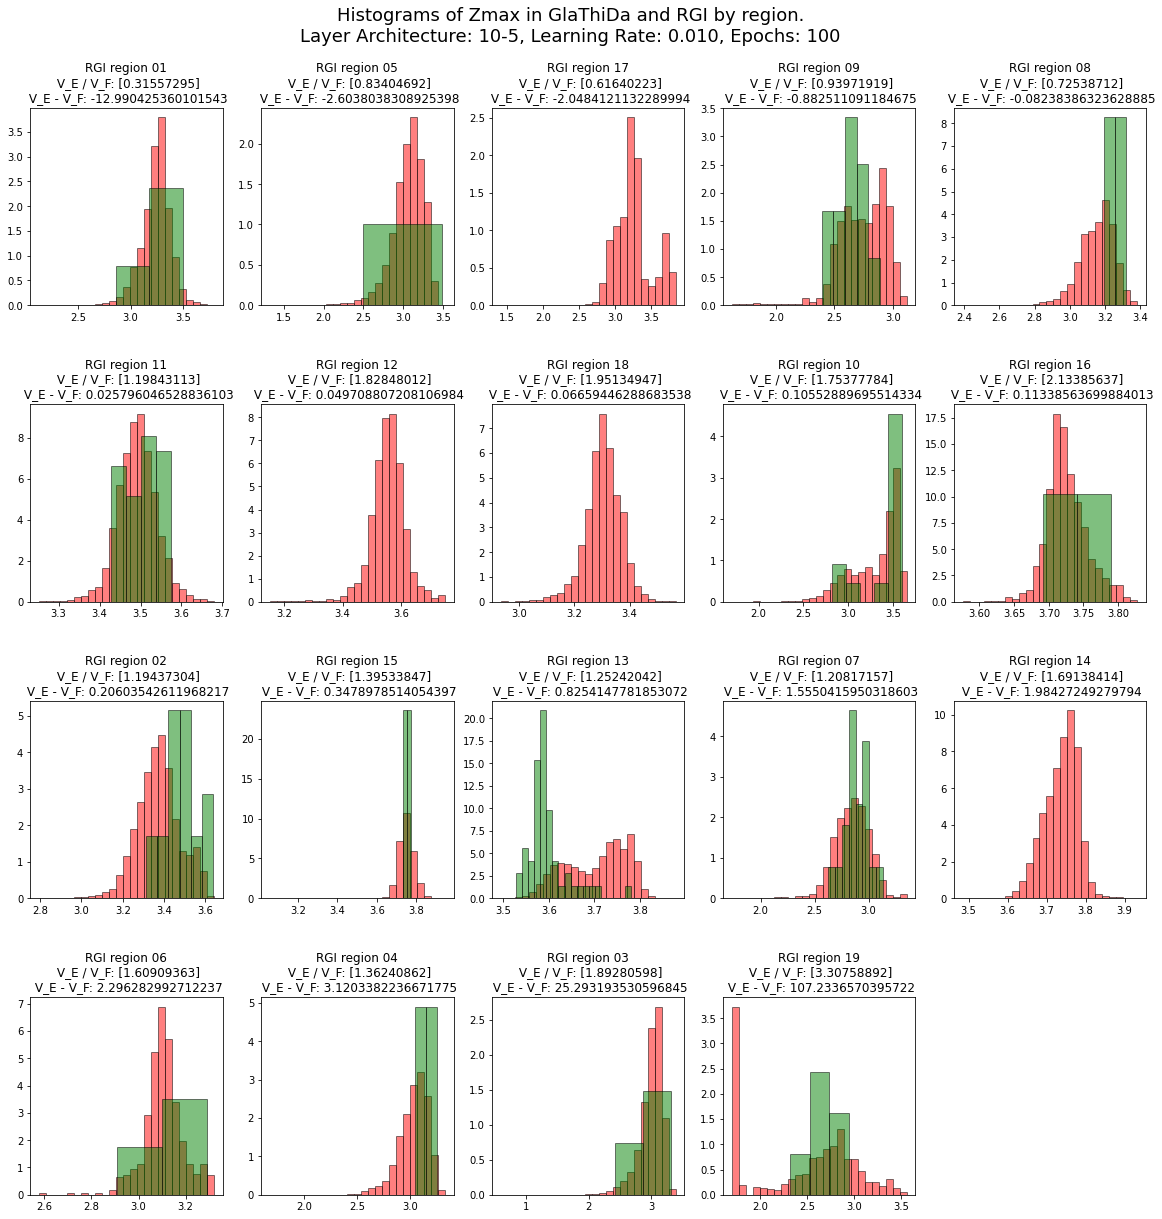

In [5]:
# histogram of each RGI region with GlaThiDa overlay but with diff order and statistics 


arch = df['architecture'].iloc[-1]


pth = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/'
pth_2 = '/home/simonhans/data/prethicktor/regional_data/raw/'


# pth = '/data/fast1/glacierml/data/RGI/rgi60-attribs/'
# pth_2 = '/data/fast1/glacierml/data/regional_data/raw/'


# Plot RGI areas first

attribute_list = [
    'Area',
#     'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
]
for attribute in attribute_list:
    fig = plt.figure(figsize=(20,20))
    plt.subplots_adjust(hspace=0.5)
    # plt.suptitle('Attribute comparison between GlaThiDa and RGI', fontsize=18, y=0.95)
    fig.patch.set_facecolor('w')
    plt.suptitle(
        'Histograms of ' + attribute + 
        ' in GlaThiDa and RGI by region.' + 
        '\nLayer Architecture: ' + df['architecture'].iloc[-1] +
        ', Learning Rate: ' + df['learning rate'].iloc[-1] +
        ', Epochs: ' + df['epochs'].iloc[-1], 
        fontsize=18, y=0.95
    )    
    for n, index in (enumerate(df['voldiff'].sort_values(ascending = True).index )):
    #     print(index)
    #     print(df['dataframe'].loc[index])

        for rgi_file in (os.listdir(pth)):
            region_number = rgi_file[:2]

            if region_number == df['dataframe'].str[4:].loc[index]:

                file_reader = pd.read_csv(
                    pth + rgi_file, 
                    encoding_errors = 'replace', 
                    on_bad_lines = 'skip'
                )
                file_reader.dropna()
                file_reader[file_reader[attribute] == 0 ] = 0.0001
                ax = plt.subplot(4, 5, n + 1)

                vol_index = df[df['dataframe'].str[4:] == region_number].index
                vol_edasi = df['vol'].loc[vol_index].values
                vol_farinotti = df['volf'].loc[vol_index].values

                vol_ratio = vol_edasi / vol_farinotti

                plt.hist(
                            np.log10(file_reader[attribute]), 
                            bins = 25,
                            label = 'RGI ' + attribute, 
                            alpha = 0.5, 
                            color = 'red',
                            density = True,
                            edgecolor = 'black'
            #                 log = True
                )

                ax.set_title('RGI region ' + region_number + 
                             '\n V_E / V_F: ' + 
                             str(vol_ratio) +
                             '\n V_E - V_F: ' +
                             str(df['voldiff'].loc[index])
                )

                # open up matching GlaThiDa file and plot those areas
                for glathida_file in os.listdir(pth_2):
                    if glathida_file[:2] == region_number:

                        g_reg = pd.read_csv(pth_2 + glathida_file)
                        g_reg.dropna()
                        g_reg[g_reg[attribute] == 0 ] = 0.0001
                        q1 = g_reg[attribute].quantile(q = 0.25)
                        q3 = g_reg[attribute].quantile(q = 0.75)
                        iqr = q3 - q1

                        if len(g_reg) == 1:
                            bin_width = 1
                            bin_count = 1
            #                 print('bin width = ' + bin_width.type())

                        elif len(g_reg) > 1:
                            bin_width = (2 * iqr) / (len(g_reg) ** (1 / 3))
    #                         print(bin_width)
    #                         bin_width = min(bin_width, 50)
            #                 print('bin count = ' + bin_count)
                            bin_count = int(
                                    np.ceil(
                                        (
                                            g_reg[attribute].max() - g_reg[attribute].min()
                                        ) / bin_width
                                    )
                            )
                        plt.hist(
                            np.log10(g_reg[attribute]), 
                            bins = bin_count,
                            label = 'GlaThiDa ' + attribute, 
                            alpha = 0.5, 
                            color = 'green',
                            density = True,
                            edgecolor = 'black'
            #                 log = True
                        )

            #             ax.set_xlabel('xlabel')
            #             ax.set_ylabel('ylabel')
#     plt.savefig('figs/histogram_' + attribute + '_' + 
#                 arch + '_' + learningrate + '_' + epochs + '.png')
#     plt.savefig('figs/histogram_' + attribute + '_' + 
#                 arch + '_' + learningrate + '_' + epochs + '.eps')